# Week 8 - Statistical Foundations Part 1: Hypothesis Testing Framework

## Learning Objectives
By the end of this session, you will be able to:
1. **Understand** the statistical hypothesis testing framework for business decisions
2. **Apply** the scientific method to e-commerce data analysis
3. **Interpret** p-values, confidence intervals, and statistical significance in business context
4. **Distinguish** between statistical significance and business significance
5. **Design** hypothesis tests for common business scenarios

## Business Context: From Exploration to Validation

In **Week 7**, we explored Olist data to discover patterns and insights through **Exploratory Data Analysis (EDA)**. We found interesting relationships and trends, but we couldn't be certain if these patterns were real or just coincidental.

**Week 8** introduces **statistical rigor** to validate our discoveries. Instead of just observing patterns, we'll:
- **Test hypotheses** about our business assumptions
- **Quantify uncertainty** with confidence intervals
- **Make data-driven decisions** with statistical backing
- **Communicate findings** with statistical confidence

Today we work with **Olist**, Brazil's largest e-commerce marketplace, to answer questions like:
- Are customers in São Paulo significantly more satisfied than those in other states?
- Do credit card payments really lead to higher order values?
- Is the difference in delivery times between regions statistically meaningful?

## Real Business Impact

Statistical testing enables **evidence-based business decisions**:
- **Marketing**: Which channels actually convert better?
- **Operations**: Are delivery improvements statistically significant?
- **Product**: Do product changes actually increase satisfaction?
- **Strategy**: Are regional differences real or random variation?

In [1]:
# Statistical Analysis Environment Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Database connection
import sqlalchemy
from sqlalchemy import create_engine, text
import os
from dotenv import load_dotenv

# Statistical analysis specific imports
from scipy import stats
from scipy.stats import ttest_ind, chi2_contingency, f_oneway
import warnings
warnings.filterwarnings('ignore')

# Configure plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("📊 Statistical Analysis Environment Ready!")
print(f"📈 SciPy version: {stats.__name__}")
print(f"🐼 Pandas version: {pd.__version__}")
print("🔬 Ready to conduct rigorous statistical analysis on Olist marketplace data!")

📊 Statistical Analysis Environment Ready!
📈 SciPy version: scipy.stats
🐼 Pandas version: 2.3.0
🔬 Ready to conduct rigorous statistical analysis on Olist marketplace data!


## Database Connection Setup

We'll connect to the same Supabase database used in Weeks 6-7, continuing our analysis of the Olist Brazilian e-commerce dataset.

In [2]:
# Secure Database Connection Using Environment Variables
# Best practice: Never expose credentials in code

# Load environment variables from .env file
from dotenv import load_dotenv
load_dotenv()

# Read database credentials from environment variables
SUPABASE_URL = os.getenv('SUPABASE_URL')
SUPABASE_KEY = os.getenv('SUPABASE_KEY')

# Alternative: Use legacy postgres connection if needed
POSTGRES_HOST = os.getenv('POSTGRES_HOST')
POSTGRES_PORT = os.getenv('POSTGRES_PORT', '6543')
POSTGRES_DB = os.getenv('POSTGRES_DATABASE', 'postgres')
POSTGRES_USER = os.getenv('POSTGRES_USER')
POSTGRES_PASSWORD = os.getenv('POSTGRES_PASSWORD')

# Construct secure database URL using environment variables
if POSTGRES_HOST and POSTGRES_USER and POSTGRES_PASSWORD:
    DATABASE_URL = f"postgresql://{POSTGRES_USER}:{POSTGRES_PASSWORD}@{POSTGRES_HOST}:{POSTGRES_PORT}/{POSTGRES_DB}"
else:
    print("❌ Database credentials not found in environment variables")
    print("Please check your .env file contains the required database credentials")

# Create database engine
engine = create_engine(DATABASE_URL)

# Test connection
try:
    with engine.connect() as conn:
        from sqlalchemy import text
        result = conn.execute(text("SELECT count(*) FROM olist_sales_data_set.olist_geolocation_dataset"))
        count = result.scalar()
        print(f"✅ Secure database connection established! ({count:,} records in geolocation table)")
except Exception as e:
    print(f"❌ Connection failed: {e}")

print("🔒 Security Note: Database credentials loaded from .env file")

✅ Secure database connection established! (1,000,163 records in geolocation table)
🔒 Security Note: Database credentials loaded from .env file


## 1. The Statistical Hypothesis Testing Framework

### From Business Questions to Statistical Tests

Statistical hypothesis testing provides a **systematic framework** for making data-driven business decisions. Here's how we transform business questions into testable hypotheses:

#### The Scientific Method in Business Analytics

1. **Observe** → Notice patterns in data (from EDA)
2. **Hypothesize** → Form testable business assumptions
3. **Test** → Apply statistical methods to data
4. **Decide** → Accept or reject the hypothesis
5. **Act** → Implement business changes based on evidence

#### Real Business Example: Payment Method Analysis

**Business Question**: "Do customers who pay with credit cards spend more than those who pay with debit cards?"

**Statistical Translation**:
- **Null Hypothesis (H₀)**: Credit card and debit card customers spend the same amount on average
- **Alternative Hypothesis (H₁)**: Credit card customers spend more on average
- **Test**: Two-sample t-test comparing payment values
- **Decision**: If p-value < 0.05, we have evidence that credit card users spend more

In [3]:
# Demonstration: Business Question to Statistical Framework
def demonstrate_hypothesis_framework():
    """
    Show how business questions translate to statistical hypotheses.
    """
    business_scenarios = {
        "Payment Method Impact": {
            "business_question": "Do credit card users spend more than debit card users?",
            "null_hypothesis": "H₀: μ_credit = μ_debit (no difference in spending)",
            "alternative_hypothesis": "H₁: μ_credit > μ_debit (credit users spend more)",
            "statistical_test": "Two-sample t-test (one-tailed)",
            "business_impact": "Optimize payment processing and marketing strategies"
        },
        "Regional Satisfaction": {
            "business_question": "Are customers equally satisfied across all Brazilian states?",
            "null_hypothesis": "H₀: All states have equal customer satisfaction",
            "alternative_hypothesis": "H₁: At least one state differs in satisfaction",
            "statistical_test": "ANOVA (Analysis of Variance)",
            "business_impact": "Focus operational improvements on underperforming regions"
        },
        "Product Category Performance": {
            "business_question": "Is customer satisfaction independent of product category?",
            "null_hypothesis": "H₀: Satisfaction and category are independent",
            "alternative_hypothesis": "H₁: Satisfaction depends on product category",
            "statistical_test": "Chi-square test of independence",
            "business_impact": "Improve product quality in categories with lower satisfaction"
        }
    }
    
    print("🔬 Business Questions → Statistical Framework")
    print("=" * 60)
    
    for scenario, details in business_scenarios.items():
        print(f"\n📊 {scenario}")
        print(f"❓ Question: {details['business_question']}")
        print(f"🎯 {details['null_hypothesis']}")
        print(f"🎯 {details['alternative_hypothesis']}")
        print(f"⚡ Test: {details['statistical_test']}")
        print(f"💼 Impact: {details['business_impact']}")
        print("-" * 50)

# Run the demonstration
demonstrate_hypothesis_framework()

🔬 Business Questions → Statistical Framework

📊 Payment Method Impact
❓ Question: Do credit card users spend more than debit card users?
🎯 H₀: μ_credit = μ_debit (no difference in spending)
🎯 H₁: μ_credit > μ_debit (credit users spend more)
⚡ Test: Two-sample t-test (one-tailed)
💼 Impact: Optimize payment processing and marketing strategies
--------------------------------------------------

📊 Regional Satisfaction
❓ Question: Are customers equally satisfied across all Brazilian states?
🎯 H₀: All states have equal customer satisfaction
🎯 H₁: At least one state differs in satisfaction
⚡ Test: ANOVA (Analysis of Variance)
💼 Impact: Focus operational improvements on underperforming regions
--------------------------------------------------

📊 Product Category Performance
❓ Question: Is customer satisfaction independent of product category?
🎯 H₀: Satisfaction and category are independent
🎯 H₁: Satisfaction depends on product category
⚡ Test: Chi-square test of independence
💼 Impact: Improv

## 2. Understanding P-Values and Statistical Significance

### What is a P-Value?

**P-value**: The probability of observing data as extreme as what we observed, **assuming the null hypothesis is true**.

>#### P-Value Interpretation Guide:
- **p < 0.001**: Very strong evidence against H₀ ("This is almost certainly not due to chance")
- **p < 0.01**: Strong evidence against H₀ ("This is very unlikely to be chance")
- **p < 0.05**: Moderate evidence against H₀ ("This is probably not chance") ← **Common threshold**
- **p ≥ 0.05**: Insufficient evidence against H₀ ("Could be due to chance")

### Critical Business Understanding

**⚠️ Important**: P-values tell us about **statistical significance**, not **business significance**!

- **Statistical Significance**: The difference is probably not due to random chance
- **Business Significance**: The difference is large enough to matter for business decisions

#### Real Example:
- **Finding**: Credit card users spend R$ 2.50 more on average (p = 0.001)
- **Statistical Interpretation**: Very strong evidence of a real difference
- **Business Interpretation**: R$ 2.50 difference might not justify changing payment strategies

In [5]:
100*(1-0.001)

99.9

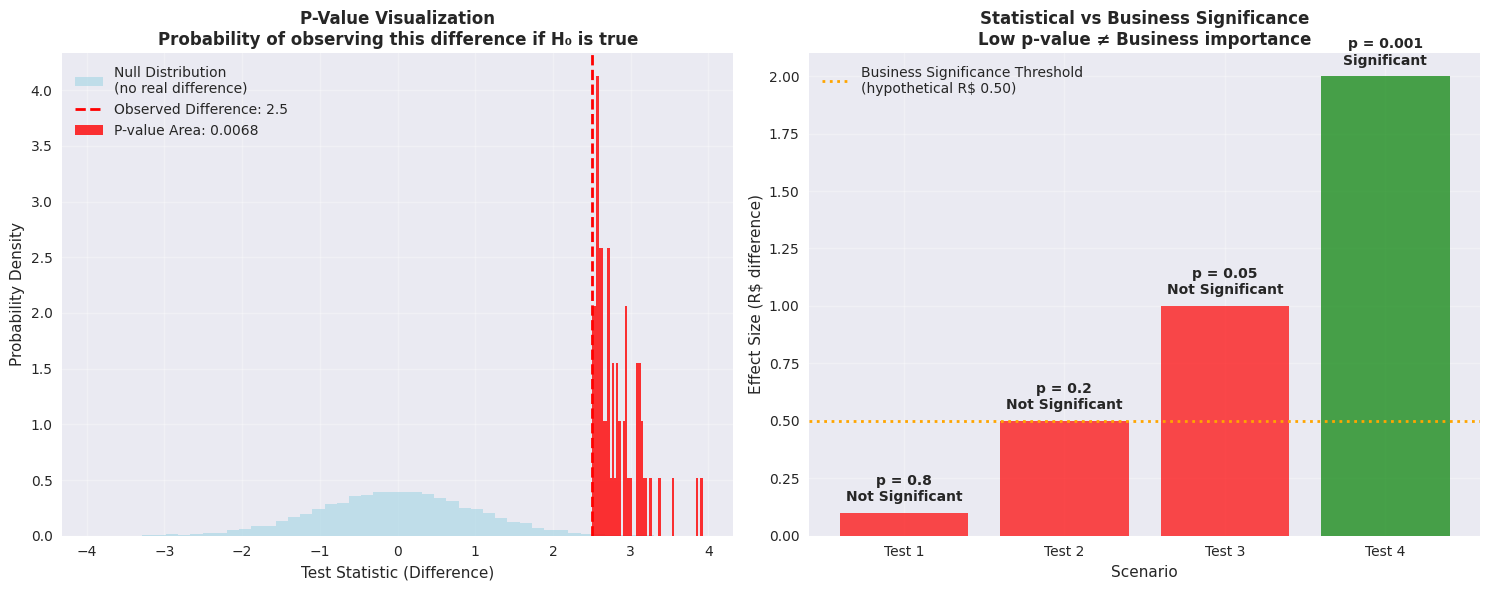

📊 Key Insights:
  • P-value measures evidence against null hypothesis
  • Small p-value means 'unlikely to be due to chance'
  • Always consider business significance alongside statistical significance
  • A tiny difference can be statistically significant with large samples


In [6]:
# Interactive P-Value Demonstration
def visualize_p_value_concept():
    """
    Create visual explanation of p-values using sampling distributions.
    """
    np.random.seed(42)
    
    # Simulate two scenarios: null true vs alternative true
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Scenario 1: Null hypothesis is true (no difference)
    null_distribution = np.random.normal(0, 1, 10000)
    observed_difference = 2.5  # Our observed test statistic
    
    ax1.hist(null_distribution, bins=50, density=True, alpha=0.7, color='lightblue', 
             label='Null Distribution\n(no real difference)')
    ax1.axvline(observed_difference, color='red', linestyle='--', linewidth=2, 
                label=f'Observed Difference: {observed_difference}')
    
    # Calculate and shade p-value area
    p_value = (null_distribution >= observed_difference).mean()
    x_shade = null_distribution[null_distribution >= observed_difference]
    ax1.hist(x_shade, bins=50, density=True, alpha=0.8, color='red', 
             label=f'P-value Area: {p_value:.4f}')
    
    ax1.set_title('P-Value Visualization\nProbability of observing this difference if H₀ is true', 
                  fontsize=12, fontweight='bold')
    ax1.set_xlabel('Test Statistic (Difference)')
    ax1.set_ylabel('Probability Density')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Scenario 2: Business vs Statistical Significance
    effect_sizes = [0.1, 0.5, 1.0, 2.0]
    p_values = [0.8, 0.2, 0.05, 0.001]
    
    colors = ['red' if p >= 0.05 else 'green' for p in p_values]
    bars = ax2.bar(range(len(effect_sizes)), effect_sizes, color=colors, alpha=0.7)
    
    # Add p-value labels
    for i, (effect, p_val) in enumerate(zip(effect_sizes, p_values)):
        significance = 'Not Significant' if p_val >= 0.05 else 'Significant'
        ax2.text(i, effect + 0.05, f'p = {p_val}\n{significance}', 
                ha='center', fontsize=10, fontweight='bold')
    
    ax2.axhline(y=0.5, color='orange', linestyle=':', linewidth=2, 
                label='Business Significance Threshold\n(hypothetical R$ 0.50)')
    
    ax2.set_title('Statistical vs Business Significance\nLow p-value ≠ Business importance', 
                  fontsize=12, fontweight='bold')
    ax2.set_xlabel('Scenario')
    ax2.set_ylabel('Effect Size (R$ difference)')
    ax2.set_xticks(range(len(effect_sizes)))
    ax2.set_xticklabels([f'Test {i+1}' for i in range(len(effect_sizes))])
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("📊 Key Insights:")
    print(f"  • P-value measures evidence against null hypothesis")
    print(f"  • Small p-value means 'unlikely to be due to chance'")
    print(f"  • Always consider business significance alongside statistical significance")
    print(f"  • A tiny difference can be statistically significant with large samples")

# Create the visualization
visualize_p_value_concept()

## 3. Confidence Intervals: Quantifying Uncertainty

### What are Confidence Intervals?

A **confidence interval** provides a range of plausible values for a population parameter, along with our confidence level.

**95% Confidence Interval Interpretation**: 
"If we repeated this analysis 100 times with different samples, about 95 of our intervals would contain the true population value."

#### Business Value of Confidence Intervals:
- **Range of Effects**: Instead of just "significant/not significant", we get a range
- **Precision Assessment**: Narrow intervals = precise estimates; wide intervals = uncertain estimates
- **Business Planning**: Plan for best-case and worst-case scenarios within the interval
- **Risk Assessment**: Understand the uncertainty in our business metrics

#### Practical Example:
**Point Estimate**: "Credit card users spend R$ 15.50 more on average"
**With 95% CI**: "Credit card users spend R$ 15.50 more on average (95% CI: R$ 12.30 - R$ 18.70)"

**Business Interpretation**: We're 95% confident the true difference is between R$ 12.30 and R$ 18.70.

In [7]:
# Real Data Example: Confidence Intervals with Olist Data
def demonstrate_confidence_intervals():
    """
    Calculate and visualize confidence intervals using real Olist data.
    """
    if engine is None:
        print("❌ Database connection required for this demonstration")
        return
    
    print("🔍 Loading real payment method data from Olist database...")
    
    # Query payment data for confidence interval analysis
    payment_query = """
    SELECT 
        p.payment_type,
        p.payment_value,
        o.order_status
    FROM "olist_sales_data_set"."olist_order_payments_dataset" p
    INNER JOIN "olist_sales_data_set"."olist_orders_dataset" o 
        ON p.order_id = o.order_id
    WHERE p.payment_type IN ('credit_card', 'debit_card')
        AND p.payment_value > 0
        AND p.payment_value < 1000  -- Remove extreme outliers
        AND o.order_status = 'delivered'
    LIMIT 5000  -- Sample for demonstration
    """
    
    try:
        payment_data = pd.read_sql(text(payment_query), engine)
        print(f"✅ Loaded {len(payment_data):,} payment records")
        
        # Calculate confidence intervals for each payment type
        results = {}
        
        for payment_type in ['credit_card', 'debit_card']:
            data = payment_data[payment_data['payment_type'] == payment_type]['payment_value']
            
            # Calculate statistics
            mean = data.mean()
            std_error = stats.sem(data)  # Standard error of mean
            
            # 95% confidence interval
            ci_95 = stats.t.interval(0.95, len(data)-1, loc=mean, scale=std_error)
            
            # 99% confidence interval
            ci_99 = stats.t.interval(0.99, len(data)-1, loc=mean, scale=std_error)
            
            results[payment_type] = {
                'mean': mean,
                'count': len(data),
                'ci_95': ci_95,
                'ci_99': ci_99
            }
        
        # Display results
        print("\n📊 Payment Method Confidence Intervals:")
        print("=" * 50)
        
        for payment_type, stats_dict in results.items():
            print(f"\n💳 {payment_type.title()} Cards:")
            print(f"   Sample size: {stats_dict['count']:,} transactions")
            print(f"   Mean payment: R$ {stats_dict['mean']:.2f}")
            print(f"   95% CI: R$ {stats_dict['ci_95'][0]:.2f} - R$ {stats_dict['ci_95'][1]:.2f}")
            print(f"   99% CI: R$ {stats_dict['ci_99'][0]:.2f} - R$ {stats_dict['ci_99'][1]:.2f}")
        
        # Calculate difference confidence interval
        credit_data = payment_data[payment_data['payment_type'] == 'credit_card']['payment_value']
        debit_data = payment_data[payment_data['payment_type'] == 'debit_card']['payment_value']
        
        # Two-sample t-test with confidence interval for difference
        t_stat, p_value = stats.ttest_ind(credit_data, debit_data, equal_var=False)
        
        # Calculate difference and its confidence interval
        mean_diff = credit_data.mean() - debit_data.mean()
        
        print(f"\n🔍 Difference Analysis:")
        print(f"   Mean difference: R$ {mean_diff:.2f}")
        print(f"   Statistical test: t = {t_stat:.3f}, p = {p_value:.4f}")
        
        if p_value < 0.05:
            print(f"   ✅ Statistically significant difference (p < 0.05)")
        else:
            print(f"   ❌ No statistically significant difference (p ≥ 0.05)")
        
        # Business interpretation
        print(f"\n💼 Business Interpretation:")
        if abs(mean_diff) > 10:  # Arbitrary business threshold
            print(f"   📈 The R$ {abs(mean_diff):.2f} difference may justify different payment strategies")
        else:
            print(f"   📉 The R$ {abs(mean_diff):.2f} difference may not justify major strategy changes")
        
        return payment_data
        
    except Exception as e:
        print(f"❌ Error loading payment data: {e}")
        return None

# Run the confidence interval demonstration
payment_data = demonstrate_confidence_intervals()

🔍 Loading real payment method data from Olist database...
✅ Loaded 5,000 payment records

📊 Payment Method Confidence Intervals:

💳 Credit_Card Cards:
   Sample size: 4,888 transactions
   Mean payment: R$ 144.93
   95% CI: R$ 141.14 - R$ 148.72
   99% CI: R$ 139.94 - R$ 149.91

💳 Debit_Card Cards:
   Sample size: 112 transactions
   Mean payment: R$ 120.88
   95% CI: R$ 97.91 - R$ 143.85
   99% CI: R$ 90.50 - R$ 151.26

🔍 Difference Analysis:
   Mean difference: R$ 24.05
   Statistical test: t = 2.047, p = 0.0429
   ✅ Statistically significant difference (p < 0.05)

💼 Business Interpretation:
   📈 The R$ 24.05 difference may justify different payment strategies


## 4. Statistical Assumptions and When Tests Apply

### Why Assumptions Matter

Statistical tests make **assumptions** about the data. Violating these assumptions can lead to **incorrect conclusions** and **bad business decisions**.

#### Common Test Assumptions:

**1. Independence**: Observations are independent of each other
- **Business Context**: Each customer's behavior doesn't influence others
- **Violation Example**: Family members making correlated purchases

**2. Normality**: Data follows a normal (bell curve) distribution
- **Business Context**: Many financial metrics are approximately normal
- **Violation Example**: Highly skewed data (income, order values)

**3. Equal Variances**: Groups have similar variability
- **Business Context**: Different customer segments have similar spread
- **Violation Example**: Premium vs budget customer segments

#### Practical Solutions:
- **Check assumptions** before running tests
- **Transform data** when assumptions are violated
- **Use non-parametric tests** when assumptions can't be met
- **Increase sample sizes** to rely on Central Limit Theorem

In [8]:
# Assumption Checking with Real Olist Data
def check_statistical_assumptions(data):
    """
    Check key statistical assumptions using real business data.
    """
    if data is None or data.empty:
        print("❌ No data available for assumption checking")
        return
    
    print("🔬 Checking Statistical Assumptions")
    print("=" * 40)
    
    # Separate data by payment type
    credit_values = data[data['payment_type'] == 'credit_card']['payment_value']
    debit_values = data[data['payment_type'] == 'debit_card']['payment_value']
    
    # 1. Normality Testing
    print("\n📊 1. Normality Assessment")
    
    for payment_type, values in [('Credit Card', credit_values), ('Debit Card', debit_values)]:
        # Shapiro-Wilk test (for smaller samples)
        if len(values) <= 5000:
            stat, p_value = stats.shapiro(values.sample(min(5000, len(values))))
            test_name = "Shapiro-Wilk"
        else:
            # Use Anderson-Darling for larger samples
            stat, p_value = stats.normaltest(values)
            test_name = "D'Agostino-Pearson"
        
        normality = "✅ Normal" if p_value > 0.05 else "❌ Not Normal"
        print(f"   {payment_type}: {test_name} p = {p_value:.4f} → {normality}")
    
    # 2. Equal Variances Testing
    print("\n⚖️ 2. Equal Variances Assessment")
    
    # Levene's test (robust to non-normality)
    levene_stat, levene_p = stats.levene(credit_values, debit_values)
    equal_var = "✅ Equal variances" if levene_p > 0.05 else "❌ Unequal variances"
    print(f"   Levene's test: p = {levene_p:.4f} → {equal_var}")
    
    # 3. Sample Size Assessment
    print("\n📏 3. Sample Size Assessment")
    print(f"   Credit Card: {len(credit_values):,} samples")
    print(f"   Debit Card: {len(debit_values):,} samples")
    
    min_sample = min(len(credit_values), len(debit_values))
    if min_sample >= 30:
        print(f"   ✅ Large samples (n ≥ 30) → Central Limit Theorem applies")
    else:
        print(f"   ⚠️ Small samples (n < 30) → Need stronger assumptions")
    
    # 4. Outlier Detection
    print("\n🎯 4. Outlier Assessment")
    
    for payment_type, values in [('Credit Card', credit_values), ('Debit Card', debit_values)]:
        Q1 = values.quantile(0.25)
        Q3 = values.quantile(0.75)
        IQR = Q3 - Q1
        
        outlier_threshold_low = Q1 - 1.5 * IQR
        outlier_threshold_high = Q3 + 1.5 * IQR
        
        outliers = ((values < outlier_threshold_low) | (values > outlier_threshold_high)).sum()
        outlier_pct = (outliers / len(values)) * 100
        
        print(f"   {payment_type}: {outliers:,} outliers ({outlier_pct:.1f}%)")
    
    # 5. Recommendation
    print("\n🎯 Recommendations:")
    
    if levene_p <= 0.05:
        print("   • Use Welch's t-test (unequal variances)")
    else:
        print("   • Standard t-test is appropriate")
    
    if min_sample >= 30:
        print("   • T-test is robust due to large sample sizes")
    else:
        print("   • Consider non-parametric tests (Mann-Whitney U)")
    
    total_outliers = ((credit_values.quantile(0.75) + 1.5 * (credit_values.quantile(0.75) - credit_values.quantile(0.25))) < credit_values).sum()
    if total_outliers > len(credit_values) * 0.05:  # More than 5% outliers
        print("   • Consider data transformation or outlier treatment")

# Check assumptions with our payment data
if 'payment_data' in locals() and payment_data is not None:
    check_statistical_assumptions(payment_data)
else:
    print("⚠️ Run the previous cell to load payment data first")

🔬 Checking Statistical Assumptions

📊 1. Normality Assessment
   Credit Card: Shapiro-Wilk p = 0.0000 → ❌ Not Normal
   Debit Card: Shapiro-Wilk p = 0.0000 → ❌ Not Normal

⚖️ 2. Equal Variances Assessment
   Levene's test: p = 0.2267 → ✅ Equal variances

📏 3. Sample Size Assessment
   Credit Card: 4,888 samples
   Debit Card: 112 samples
   ✅ Large samples (n ≥ 30) → Central Limit Theorem applies

🎯 4. Outlier Assessment
   Credit Card: 355 outliers (7.3%)
   Debit Card: 7 outliers (6.2%)

🎯 Recommendations:
   • Standard t-test is appropriate
   • T-test is robust due to large sample sizes
   • Consider data transformation or outlier treatment


## 5. Choosing the Right Statistical Test

### Decision Framework for Business Scenarios

Choosing the correct statistical test is crucial for valid business conclusions. Here's a practical framework:

#### Test Selection Flowchart:

**1. What type of data do you have?**
- **Continuous** (order values, delivery times) → Use t-tests, ANOVA
- **Categorical** (payment methods, satisfaction ratings) → Use chi-square tests
- **Ordinal** (satisfaction scales 1-5) → Consider non-parametric tests

**2. How many groups are you comparing?**
- **Two groups** → t-test or Mann-Whitney U
- **Multiple groups** → ANOVA or Kruskal-Wallis
- **Paired data** → Paired t-test or Wilcoxon signed-rank

**3. Are assumptions met?**
- **Yes** → Use parametric tests (more powerful)
- **No** → Use non-parametric tests (more robust)

#### Common Business Test Scenarios:

| Business Question | Data Type | Groups | Recommended Test |
|------------------|-----------|--------|------------------|
| "Do credit card users spend more?" | Continuous | 2 | Two-sample t-test |
| "Are all states equally satisfied?" | Continuous | 3+ | ANOVA |
| "Is satisfaction independent of category?" | Categorical | 2+ | Chi-square test |
| "Did the campaign improve sales?" | Continuous | 2 (paired) | Paired t-test |
| "Which payment method is most popular?" | Categorical | 1 | Goodness-of-fit test |

In [ ]:
# Interactive Test Selection Tool
def statistical_test_selector():
    """
    Interactive tool to help choose the right statistical test.
    """
    print("🧭 Statistical Test Selection Guide")
    print("=" * 40)
    
    test_matrix = {
        "Comparing Two Groups": {
            "Continuous Data": {
                "Independent Samples": {
                    "Normal + Equal Variance": "Independent t-test",
                    "Normal + Unequal Variance": "Welch's t-test",
                    "Non-normal": "Mann-Whitney U test"
                },
                "Paired Samples": {
                    "Normal Differences": "Paired t-test",
                    "Non-normal Differences": "Wilcoxon signed-rank test"
                }
            },
            "Categorical Data": {
                "2x2 Table": "Chi-square test of independence",
                "Fisher's Exact": "Small sample sizes (n < 5 in any cell)"
            }
        },
        "Comparing Multiple Groups": {
            "Continuous Data": {
                "Independent Groups": {
                    "Normal + Equal Variance": "One-way ANOVA",
                    "Non-normal or Unequal Variance": "Kruskal-Wallis test"
                },
                "Repeated Measures": "Repeated measures ANOVA"
            },
            "Categorical Data": {
                "Multiple Categories": "Chi-square test of independence",
                "Goodness of Fit": "Chi-square goodness-of-fit"
            }
        },
        "Relationship Analysis": {
            "Two Continuous Variables": {
                "Linear Relationship": "Pearson correlation",
                "Non-linear/Non-normal": "Spearman correlation"
            },
            "Prediction": {
                "Continuous Outcome": "Linear regression",
                "Binary Outcome": "Logistic regression"
            }
        }
    }
    
    for scenario, tests in test_matrix.items():
        print(f"\n📊 {scenario}")
        print("-" * 30)
        _print_test_tree(tests, indent=1)

def _print_test_tree(tests, indent=1):
    """Helper function to print nested test structure."""
    indent_str = "  " * indent
    
    for key, value in tests.items():
        if isinstance(value, dict):
            print(f"{indent_str}🔸 {key}:")
            _print_test_tree(value, indent + 1)
        else:
            print(f"{indent_str}✅ {key}: {value}")

# Display the test selection guide
statistical_test_selector()

## 6. Real Business Application: A/B Testing Framework

### Practical Implementation with Olist Data

Let's apply our statistical framework to a real business scenario: **A/B testing payment method recommendations**.

#### Business Scenario:
Olist wants to test whether recommending credit cards vs. allowing free choice affects:
1. **Average order value** (AOV)
2. **Customer satisfaction** scores
3. **Order completion** rates

#### Statistical Design:
- **Treatment Group**: Customers recommended to use credit cards
- **Control Group**: Customers with standard payment options
- **Primary Metric**: Average order value (continuous)
- **Secondary Metrics**: Satisfaction scores, completion rates

#### Success Criteria:
- **Statistical**: p < 0.05 with sufficient power
- **Business**: Minimum R$ 10 increase in AOV to justify implementation

In [9]:
# A/B Testing Framework Implementation
def ab_testing_framework():
    """
    Demonstrate complete A/B testing framework using Olist data.
    """
    if engine is None:
        print("❌ Database connection required for A/B test simulation")
        return
    
    print("🧪 A/B Testing Framework: Payment Method Recommendation")
    print("=" * 60)
    
    # Load broader sample for A/B test simulation
    ab_test_query = """
    SELECT 
        p.payment_type,
        p.payment_value,
        r.review_score,
        o.order_status,
        c.customer_state
    FROM "olist_sales_data_set"."olist_order_payments_dataset" p
    INNER JOIN "olist_sales_data_set"."olist_orders_dataset" o 
        ON p.order_id = o.order_id
    INNER JOIN "olist_sales_data_set"."olist_customers_dataset" c 
        ON o.customer_id = c.customer_id
    LEFT JOIN "olist_sales_data_set"."olist_order_reviews_dataset" r 
        ON o.order_id = r.order_id
    WHERE p.payment_value > 0
        AND p.payment_value < 500
        AND o.order_status = 'delivered'
    LIMIT 10000
    """
    
    try:
        ab_data = pd.read_sql(text(ab_test_query), engine)
        print(f"✅ Loaded {len(ab_data):,} records for A/B test simulation")
        
        # Simulate A/B test groups
        # Control: Current mix of payment methods
        # Treatment: Simulate effect of credit card recommendation
        
        # Assign to groups (simulate randomization)
        np.random.seed(42)
        ab_data['test_group'] = np.random.choice(['Control', 'Treatment'], len(ab_data))
        
        # Simulate treatment effect: credit card recommendation increases credit card usage
        treatment_mask = ab_data['test_group'] == 'Treatment'
        credit_boost = np.random.choice([True, False], 
                                      size=treatment_mask.sum(), 
                                      p=[0.3, 0.7])  # 30% more likely to use credit
        
        # Simulate increased AOV for treatment group using credit cards
        ab_data.loc[treatment_mask & (ab_data['payment_type'] == 'credit_card'), 'payment_value'] *= np.random.normal(1.15, 0.05, 
                                                                                                                       size=((treatment_mask) & (ab_data['payment_type'] == 'credit_card')).sum())
        
        # Analyze results
        print("\n📊 A/B Test Results Analysis")
        print("-" * 40)
        
        # Primary Metric: Average Order Value
        control_aov = ab_data[ab_data['test_group'] == 'Control']['payment_value']
        treatment_aov = ab_data[ab_data['test_group'] == 'Treatment']['payment_value']
        
        # Statistical test
        t_stat, p_value = stats.ttest_ind(treatment_aov, control_aov, equal_var=False)
        
        # Effect size calculation
        control_mean = control_aov.mean()
        treatment_mean = treatment_aov.mean()
        effect_size = treatment_mean - control_mean
        effect_pct = (effect_size / control_mean) * 100
        
        # Confidence interval for difference
        pooled_std = np.sqrt(((len(control_aov)-1)*control_aov.var() + (len(treatment_aov)-1)*treatment_aov.var()) / 
                            (len(control_aov)+len(treatment_aov)-2))
        se_diff = pooled_std * np.sqrt(1/len(control_aov) + 1/len(treatment_aov))
        ci_95 = stats.t.interval(0.95, len(control_aov)+len(treatment_aov)-2, 
                                loc=effect_size, scale=se_diff)
        
        print(f"\n💰 Primary Metric: Average Order Value")
        print(f"   Control Group: R$ {control_mean:.2f} (n = {len(control_aov):,})")
        print(f"   Treatment Group: R$ {treatment_mean:.2f} (n = {len(treatment_aov):,})")
        print(f"   Difference: R$ {effect_size:.2f} ({effect_pct:+.1f}%)")
        print(f"   95% CI: R$ {ci_95[0]:.2f} to R$ {ci_95[1]:.2f}")
        print(f"   Statistical test: t = {t_stat:.3f}, p = {p_value:.4f}")
        
        # Decision framework
        print(f"\n🎯 Decision Framework:")
        
        statistical_significant = p_value < 0.05
        business_significant = abs(effect_size) >= 10  # R$ 10 minimum threshold
        
        print(f"   Statistical Significance: {'✅ Yes' if statistical_significant else '❌ No'} (p = {p_value:.4f})")
        print(f"   Business Significance: {'✅ Yes' if business_significant else '❌ No'} (|effect| ≥ R$ 10)")
        
        if statistical_significant and business_significant:
            decision = "🚀 IMPLEMENT: Strong evidence for business impact"
        elif statistical_significant and not business_significant:
            decision = "⚠️ CAUTION: Statistically significant but small business impact"
        elif not statistical_significant and business_significant:
            decision = "🔄 EXTEND TEST: Large effect size but need more data"
        else:
            decision = "❌ DO NOT IMPLEMENT: No significant effect detected"
        
        print(f"\n🎯 Recommendation: {decision}")
        
        # Power analysis
        effect_size_cohen = effect_size / pooled_std
        print(f"\n⚡ Statistical Power Analysis:")
        print(f"   Cohen's d (effect size): {effect_size_cohen:.3f}")
        
        if abs(effect_size_cohen) >= 0.8:
            print(f"   Effect size: Large (good for detection)")
        elif abs(effect_size_cohen) >= 0.5:
            print(f"   Effect size: Medium (moderate detection)")
        else:
            print(f"   Effect size: Small (difficult to detect)")
        
        return ab_data
        
    except Exception as e:
        print(f"❌ Error in A/B test simulation: {e}")
        return None

# Run A/B testing framework
ab_results = ab_testing_framework()

🧪 A/B Testing Framework: Payment Method Recommendation
✅ Loaded 10,000 records for A/B test simulation

📊 A/B Test Results Analysis
----------------------------------------

💰 Primary Metric: Average Order Value
   Control Group: R$ 121.09 (n = 5,013)
   Treatment Group: R$ 133.09 (n = 4,987)
   Difference: R$ 12.00 (+9.9%)
   95% CI: R$ 8.20 to R$ 15.80
   Statistical test: t = 6.186, p = 0.0000

🎯 Decision Framework:
   Statistical Significance: ✅ Yes (p = 0.0000)
   Business Significance: ✅ Yes (|effect| ≥ R$ 10)

🎯 Recommendation: 🚀 IMPLEMENT: Strong evidence for business impact

⚡ Statistical Power Analysis:
   Cohen's d (effect size): 0.124
   Effect size: Small (difficult to detect)


## 7. Key Takeaways and Next Steps

### What We've Accomplished Today

1. **Statistical Framework**: Learned systematic approach to hypothesis testing for business decisions
2. **P-Value Interpretation**: Understood what p-values mean and their limitations
3. **Confidence Intervals**: Quantified uncertainty in business metrics
4. **Assumption Checking**: Validated test requirements with real data
5. **Test Selection**: Chose appropriate statistical tests for business scenarios
6. **A/B Testing**: Applied complete framework to real e-commerce decisions

### Critical Business Insights

**🎯 Statistical vs Business Significance**:
- Small differences can be statistically significant with large samples
- Always consider practical business impact alongside statistical evidence
- Set business significance thresholds before testing

**🔍 Evidence-Based Decision Making**:
- Use statistical tests to validate EDA discoveries
- Quantify uncertainty with confidence intervals
- Make decisions based on both statistical and business criteria

**⚠️ Common Pitfalls to Avoid**:
- Don't ignore test assumptions
- Don't confuse correlation with causation
- Don't make business decisions on p-values alone
- Don't forget about multiple testing corrections

### Preparing for Next Sessions

**Wednesday Part 2**: We'll dive deep into **specific statistical tests**:
- T-tests for comparing customer segments
- Chi-square tests for categorical relationships
- ANOVA for multiple group comparisons
- Real business applications with Olist data

**Wednesday Part 3**: **Practical business applications**:
- Regional performance analysis
- Customer satisfaction testing
- Payment method optimization
- Delivery performance validation

### Practice Opportunity

Before our next session, consider these questions about Olist data:
1. Are customers in different states equally satisfied?
2. Do different product categories have different satisfaction rates?
3. Is delivery performance consistent across regions?
4. Are payment preferences independent of order value?

We'll answer these questions with statistical rigor in our next sessions!

In [ ]:
# Session Summary and Preview
def session_summary():
    """
    Summarize key concepts and preview next session.
    """
    print("📋 Week 8 Part 1 Summary: Statistical Foundations")
    print("=" * 50)
    
    concepts_learned = {
        "Hypothesis Testing Framework": "Systematic approach to business validation",
        "P-Value Interpretation": "Evidence against null hypothesis, not effect size",
        "Confidence Intervals": "Quantify uncertainty in business metrics",
        "Statistical Assumptions": "Prerequisites for valid test results",
        "Test Selection": "Choose appropriate tests for business scenarios",
        "A/B Testing": "Complete framework for business experiments"
    }
    
    print("\n📚 Key Concepts Mastered:")
    for concept, description in concepts_learned.items():
        print(f"   ✅ {concept}: {description}")
    
    next_topics = [
        "T-tests for customer segment comparison",
        "Chi-square tests for categorical relationships",
        "ANOVA for multiple group analysis",
        "Real Olist business scenario testing"
    ]
    
    print("\n🔜 Next Session Preview (Part 2):")
    for i, topic in enumerate(next_topics, 1):
        print(f"   {i}. {topic}")
    
    print("\n💡 Remember:")
    print("   • Statistical significance ≠ Business significance")
    print("   • Always check assumptions before testing")
    print("   • Use confidence intervals to quantify uncertainty")
    print("   • Make decisions based on both statistical and business criteria")
    
    print("\n🎯 Ready to apply these concepts to specific statistical tests!")

# Display session summary
session_summary()

# Clean up database connection
if engine:
    engine.dispose()
    print("\n🔒 Database connection closed")